In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
#from tensorflow.keras.optimizers import adam, sgd
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
from tensorflow.keras.applications import mobilenet_v2

import os,glob,random

Using TensorFlow backend.


In [9]:
mobile= mobilenet_v2.MobileNetV2(input_shape=(224,224,3),include_top=True,weights='imagenet')
mobile.trainable=False
mobile.summary()

epthwise[0][0]          
__________________________________________________________________________________________________
block_6_depthwise_relu (ReLU)   (None, 14, 14, 192)  0           block_6_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_6_project (Conv2D)        (None, 14, 14, 64)   12288       block_6_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_6_project_BN (BatchNormal (None, 14, 14, 64)   256         block_6_project[0][0]            
__________________________________________________________________________________________________
block_7_expand (Conv2D)         (None, 14, 14, 384)  24576       block_6_project_BN[0][0]         
__________________________________________________________________________________________________
block_7_expand_BN (BatchNormali (None, 14, 14, 384)  1536        block_7_expand[0][0

In [10]:
classifier=Sequential()
classifier.add(mobile)
classifier.add(Flatten())
classifier.add(Dense(256,activation='relu'))
classifier.add(Dense(2,activation='softmax'))
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 1000)              3538984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 514       
Total params: 3,795,754
Trainable params: 256,770
Non-trainable params: 3,538,984
_________________________________________________________________


In [11]:
train_gen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_gen=ImageDataGenerator(rescale=1./255)

train_dir='C:/Users/HP/Desktop/project/DATASET/TRAIN'
test_dir='C:/Users/HP/Desktop/project/DATASET/TEST'

train_generator = train_gen.flow_from_directory(train_dir, batch_size = 32, target_size = (224, 224), class_mode = 'binary')
test_generator = test_gen.flow_from_directory(test_dir, batch_size = 32, target_size = (224, 224), class_mode = 'binary')

print(train_generator)
print(test_generator)

Found 22564 images belonging to 2 classes.
Found 2519 images belonging to 2 classes.


In [12]:
hist=classifier.fit_generator(train_generator,epochs=15,validation_data=test_generator)

Epoch 1/15
706/706 [==============================] - 347s 492ms/step - loss: 0.3230 - accuracy: 0.8692 - val_loss: 0.3194 - val_accuracy: 0.8877
Epoch 2/15
706/706 [==============================] - 6794s 10s/step - loss: 0.2505 - accuracy: 0.9011 - val_loss: 0.3391 - val_accuracy: 0.8813
Epoch 3/15
706/706 [==============================] - 352s 499ms/step - loss: 0.2376 - accuracy: 0.9056 - val_loss: 0.3832 - val_accuracy: 0.8388
Epoch 4/15
706/706 [==============================] - 370s 525ms/step - loss: 0.2324 - accuracy: 0.9083 - val_loss: 0.3748 - val_accuracy: 0.8412
Epoch 5/15
706/706 [==============================] - 367s 520ms/step - loss: 0.2293 - accuracy: 0.9101 - val_loss: 0.3671 - val_accuracy: 0.8416
Epoch 6/15
706/706 [==============================] - 357s 506ms/step - loss: 0.2254 - accuracy: 0.9128 - val_loss: 0.3472 - val_accuracy: 0.8742
Epoch 7/15
706/706 [==============================] - 367s 520ms/step - loss: 0.2230 - accuracy: 0.9121 - val_loss: 0.3799 - 

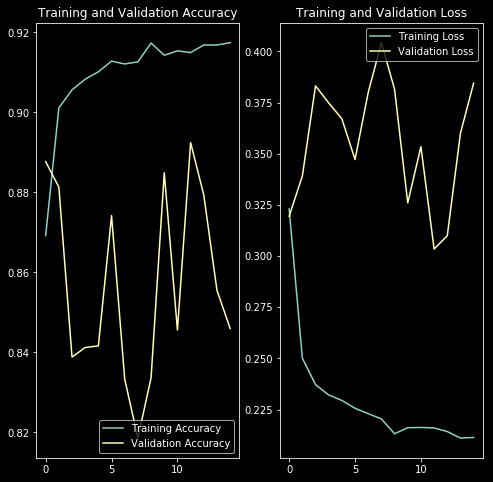

In [14]:
acc = hist.history['accuracy']
epochs=15
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
train_generator.class_indices

{'O': 0, 'R': 1}

In [ ]:
if result[0][0]==1:
    prediction='Recyclable'
else:
    prediction='Organic'

In [ ]:
print("\n%s:" % (classifier.metrics_names[1]))
print(100 * prediction)